In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
TRAIN_PATH = "/kaggle/input/titanic/train.csv"
TEST_PATH  = "/kaggle/input/titanic/test.csv"

train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

print("Train shape:", train.shape)
print("Test shape: ", test.shape)
train.head()


Train shape: (891, 12)
Test shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Fill missing values
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

for df in [train, test]:
    df["Age"] = df["Age"].fillna(df.groupby(["Sex","Pclass"])["Age"].transform("median"))

# Drop Cabin column (too many missing values)
train = train.drop(columns=["Cabin"], errors="ignore")
test  = test.drop(columns=["Cabin"], errors="ignore")

print("Missing values after cleaning:")
print(train.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


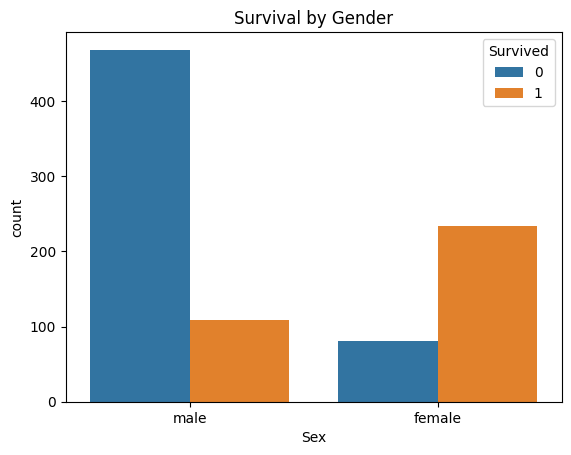

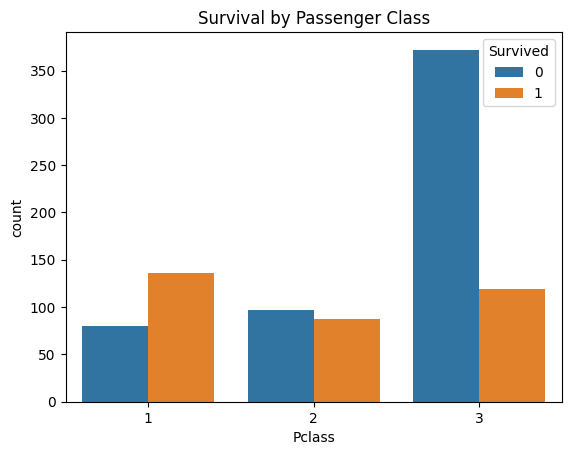

In [15]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.show()


In [16]:
# Features we want to use
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

# One-hot encoding for categorical columns
X = pd.get_dummies(train[features], drop_first=True)
X_test_final = pd.get_dummies(test[features], drop_first=True)
y = train["Survived"]

print("X shape:", X.shape)
print("X_test shape:", X_test_final.shape)


X shape: (891, 8)
X_test shape: (418, 8)


In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Decision Tree Accuracy: 0.7653631284916201

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       110
           1       0.75      0.58      0.66        69

    accuracy                           0.77       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



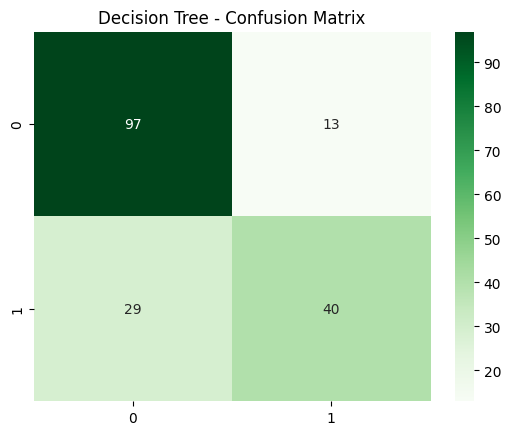

In [18]:
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_val)

print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.show()
